## 1. `Residuals Blocks `
- Theory part in video

## 2. `Inception model: Google own CNN`
- Theory part in video

## 3. `Brain Tumor Detection Problem with InceptionResNetV2`

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [15]:
dataset = r'F:\brain_tumor_dataset'
yes_path = r'F:\brain_tumor_dataset\yes'
no_path = r'F:\brain_tumor_dataset\no'

#### `read sample image`

In [16]:
img = cv2.imread(yes_path+'\\y2.jpg')
cv2.imshow('img',img)
cv2.waitKey(0)

-1

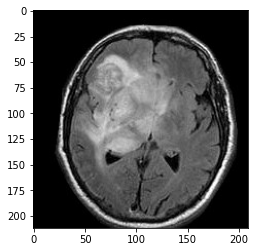

In [17]:
plt.imshow(img)

In [18]:
img.shape

(212, 209, 3)

In [19]:
img = cv2.imread(yes_path+'\\y3.jpg')
cv2.imshow('img',img)
cv2.waitKey(0)

-1

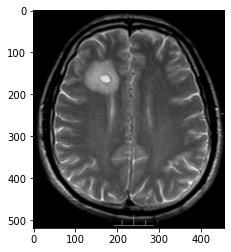

In [20]:
plt.imshow(img)

#### primary check: `shapes of images are different`

In [21]:
vals = [yes_path,no_path]
print('Yes => ',os.listdir(vals[0]).__len__())
print('No => ',os.listdir(vals[1]).__len__())

Yes =>  155
No =>  98


In [22]:
classes = ['yes','no']
filepath = []
labels = []
for i,j in zip(vals,classes):
    filelist = os.listdir(i)
    print(filelist)
    for name in filelist:
        x = os.path.join(i,name)
        filepath.append(x)
        labels.append(j)
print(filepath.__len__(),labels.__len__())

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [23]:
filepath[:5]

['F:\\brain_tumor_dataset\\yes\\Y1.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y10.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y100.JPG',
 'F:\\brain_tumor_dataset\\yes\\Y101.jpg',
 'F:\\brain_tumor_dataset\\yes\\Y102.jpg']

In [24]:
labels[:5]

['yes', 'yes', 'yes', 'yes', 'yes']

In [25]:
datazip = list(zip(filepath,labels))
pathframe = pd.DataFrame(datazip,columns=['filepath','labels'])

In [26]:
pathframe.head()

,filepath,labels
0,F:\brain_tumor_dataset\yes\Y1.jpg,yes
1,F:\brain_tumor_dataset\yes\Y10.jpg,yes
2,F:\brain_tumor_dataset\yes\Y100.JPG,yes
3,F:\brain_tumor_dataset\yes\Y101.jpg,yes
4,F:\brain_tumor_dataset\yes\Y102.jpg,yes


In [27]:
pathframe.tail()

,filepath,labels
248,F:\brain_tumor_dataset\no\No18.jpg,no
249,F:\brain_tumor_dataset\no\No19.jpg,no
250,F:\brain_tumor_dataset\no\No20.jpg,no
251,F:\brain_tumor_dataset\no\No21.jpg,no
252,F:\brain_tumor_dataset\no\No22.jpg,no


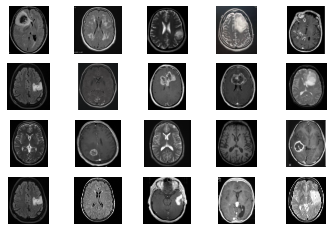

In [31]:
for i in range(20):
    vals = np.random.randint(0,len(pathframe))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(pathframe.filepath[vals]))
    plt.axis('off')
plt.show()

In [32]:
train,test = train_test_split(pathframe,test_size=0.1,random_state=42)
train_new,valid = train_test_split(train,test_size=0.1,random_state=42)
print(train_new.shape,test.shape,valid.shape)

(204, 2) (26, 2) (23, 2)


In [45]:
train_new.head()

,filepath,labels
91,F:\brain_tumor_dataset\yes\Y29.jpg,yes
45,F:\brain_tumor_dataset\yes\Y169.jpg,yes
158,F:\brain_tumor_dataset\no\12 no.jpg,no
82,F:\brain_tumor_dataset\yes\Y254.jpg,yes
77,F:\brain_tumor_dataset\yes\Y25.jpg,yes


In [46]:
test.head()

,filepath,labels
208,F:\brain_tumor_dataset\no\N17.jpg,no
6,F:\brain_tumor_dataset\yes\Y104.jpg,yes
79,F:\brain_tumor_dataset\yes\Y251.JPG,yes
204,F:\brain_tumor_dataset\no\N1.JPG,no
117,F:\brain_tumor_dataset\yes\Y55.jpg,yes


In [47]:
valid.head()

,filepath,labels
25,F:\brain_tumor_dataset\yes\Y147.JPG,yes
43,F:\brain_tumor_dataset\yes\Y167.JPG,yes
175,F:\brain_tumor_dataset\no\29 no.jpg,no
192,F:\brain_tumor_dataset\no\44no.jpg,no
49,F:\brain_tumor_dataset\yes\Y180.jpg,yes


### `preprocessing technique`

In [33]:
train_datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                                  zoom_range=.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

### `applying preprocessing accordingly`

In [34]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train_new,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

test_gen = test_datagen.flow_from_dataframe(dataframe=test,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

Found 204 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.


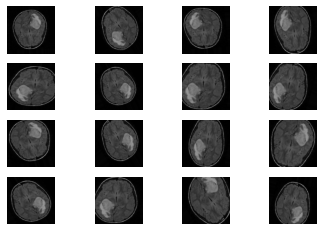

In [39]:
for i in range(16):
    vals = train_gen[0][0][0]
    vals = vals.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

#### `single image`

In [40]:
 train_gen[0][0][0].shape

(150, 150, 3)

In [43]:
train_gen[0][0].shape  # batch wise

(16, 150, 150, 3)

### `rescale train data before applying to our model`

In [48]:
train_datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                                  zoom_range=.2,horizontal_flip=True,vertical_flip=True)

In [49]:
train_gen = train_datagen.flow_from_dataframe(dataframe=train_new,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

test_gen = test_datagen.flow_from_dataframe(dataframe=test,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe=valid,x_col='filepath',
                                             y_col='labels',batch_size=16,target_size=(150,150),
                                             class_mode='binary',shuffle=True)

Found 204 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.


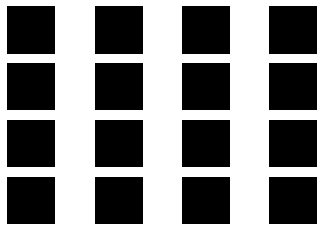

In [50]:
for i in range(16):
    vals = train_gen[0][0][0]
    vals = vals.astype('uint8')
    plt.subplot(4,4,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

#### `single image`

In [51]:
 train_gen[0][0][0].shape

(150, 150, 3)

In [59]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet',input_shape=(150,150,3),include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               196736    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 54,533,601
Trainable params: 54,473,057


In [61]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_gen,validation_data=valid_gen,epochs=5,verbose=2)

Epoch 1/5
13/13 - 188s - loss: 0.6248 - accuracy: 0.6765 - val_loss: 9.8384 - val_accuracy: 0.3043 - 188s/epoch - 14s/step
Epoch 2/5
13/13 - 123s - loss: 0.3512 - accuracy: 0.8284 - val_loss: 13.9479 - val_accuracy: 0.6957 - 123s/epoch - 9s/step
Epoch 3/5
13/13 - 108s - loss: 0.4407 - accuracy: 0.8235 - val_loss: 21.3459 - val_accuracy: 0.2609 - 108s/epoch - 8s/step
Epoch 4/5
13/13 - 126s - loss: 0.2431 - accuracy: 0.9069 - val_loss: 3.1194 - val_accuracy: 0.7391 - 126s/epoch - 10s/step
Epoch 5/5
13/13 - 123s - loss: 0.1782 - accuracy: 0.9412 - val_loss: 0.5922 - val_accuracy: 0.8696 - 123s/epoch - 9s/step


## `END ----------------------------------------`